In [1]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

In [2]:
df = pd.read_csv('../data/dirty_data.csv')

In [3]:
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)*2-1
df = pd.DataFrame(x_scaled)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8
0,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333,1.0
1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207154,-0.766866,-0.666667,-1.0
2,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333,1.0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000,-1.0
4,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,1.0


In [5]:
df_features=df[list(range(8))]
df_target=df[8]
X=df_features.values
y=df_target.values
target_names=df_target.unique()

In [6]:
df_target.value_counts(normalize=True)

-1.0    0.651042
 1.0    0.348958
Name: 8, dtype: float64

# Importing our own little perceptron

In [7]:
import Perceptron as Custom_Perceptron

In [8]:
baby = Custom_Perceptron.Perceptron(n_epochs=500,training_step=.1)

In [9]:
X_train = df_features.iloc[:300]
X_test = df_features.iloc[301:500]
X_val = df_features.iloc[501:]

y_train = df_target.iloc[:300]
y_test = df_target.iloc[301:500]
y_val = df_target.iloc[501:]




In [10]:
weights = baby.fit(X_train,y_train,X_val,y_val)
y_pred=baby.predict(X_test)
accuracy,loss,val_acc = baby.get_metrics()

100%|██████████| 500/500 [00:00<00:00, 542.42it/s]


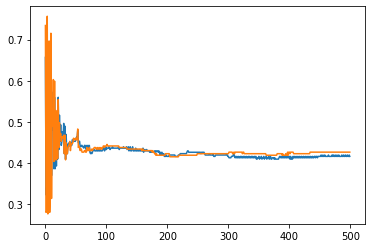

In [11]:
plt.plot(accuracy)
plt.plot(val_acc)

# Trying our perceptron with linearly separable data

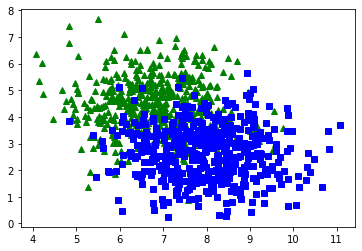

In [22]:
from sklearn import datasets
from sklearn.model_selection import train_test_split



X_2, y_2 = datasets.make_blobs(n_samples=1000, centers=2, n_features=2, center_box=(0, 10))
y_2 = y_2*2-1

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.33, random_state=42)

plt.plot(X_2[:, 0][y_2 == -1], X_2[:, 1][y_2 == -1], 'g^')
plt.plot(X_2[:, 0][y_2 == 1], X_2[:, 1][y_2 == 1], 'bs')
plt.show()

In [23]:
baby2 = Custom_Perceptron.Perceptron(n_epochs=2000,training_step=1)

In [24]:
weights_2=baby2.fit(pd.DataFrame(X_2),pd.Series(y_2))

100%|██████████| 2000/2000 [00:03<00:00, 598.09it/s]


In [25]:
baby2.score(X_2,y_2)

0.85

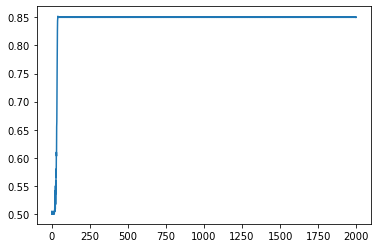

In [26]:
plt.plot(baby2.get_metrics()[0])

# Trying other standard models

In [33]:
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_2,y_2)
clf2 = Perceptron(tol=1e-3, random_state=0)
clf2.fit(X_train,y_train)


Perceptron()

In [30]:

clf.score(X_2,y_2)

0.845

In [36]:

clf2.score(X_val,y_val)

0.3857677902621723

In [31]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=20000).fit(X_2, y_2)



In [32]:
clf.score(X_2,y_2)

0.846